# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

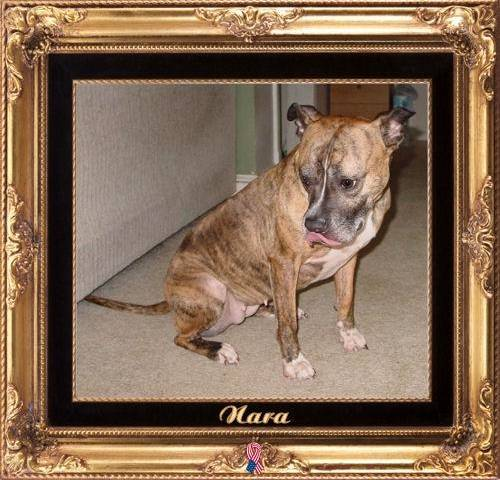

In [19]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/tensorflow-dog-cat/treino/dogs/dog.98.jpg')

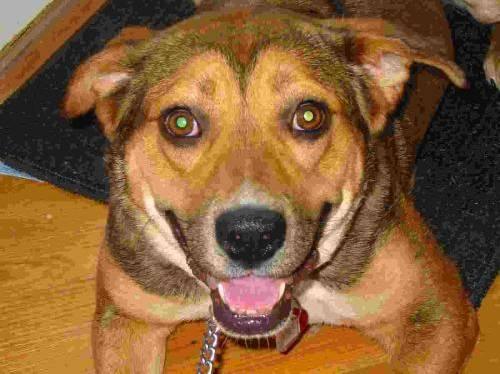

In [22]:
# Do dataset de treino, carregue uma imagem de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/tensorflow-dog-cat/treino/dogs/dog.99.jpg')

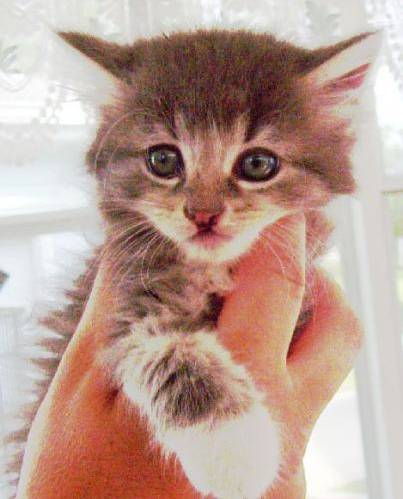

In [23]:
# Do dataset de treino, carregue uma imagem de gato
from IPython.display import Image
Image(filename='/content/drive/MyDrive/tensorflow-dog-cat/treino/cats/cat.100.jpg')


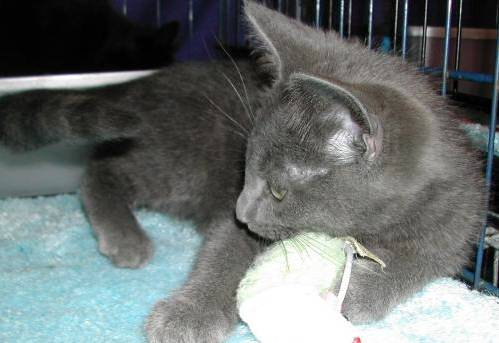

In [24]:
# Do dataset de teste, carregue uma imagem de gato ou de cachorro
from IPython.display import Image
Image(filename='/content/drive/MyDrive/tensorflow-dog-cat/teste/100.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.



In [11]:
import tensorflow as tf
import keras as K
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D, Dropout,MaxPooling2D, Flatten, Dense

In [12]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [13]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#Normalização de pesos para evitar overfitting
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2 )

In [29]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/tensorflow-dog-cat/treino',
                                                 target_size = (256, 256),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 subset='training')

# Criar o conjunto de validação
validation_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/tensorflow-dog-cat/treino',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    subset='validation'  # Este é o conjunto de validação
)

Found 802 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

**Treinamento do Modelo**

In [31]:
# Executando o treinamento
classifier.fit(
    training_set,
    validation_data=validation_set,
    steps_per_epoch=625,
    validation_steps=validation_set.samples // validation_set.batch_size,
    callbacks=[early_stopping],  # Ajustado com base no número total de imagens e batch size
    epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 144ms/step - accuracy: 0.6552 - loss: 0.6382 - val_accuracy: 0.6719 - val_loss: 0.6326
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 146ms/step - accuracy: 0.6545 - loss: 0.6133 - val_accuracy: 0.6354 - val_loss: 0.6276
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 136ms/step - accuracy: 0.6822 - loss: 0.6041 - val_accuracy: 0.6562 - val_loss: 0.6555
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 139ms/step - accuracy: 0.7099 - loss: 0.5783 - val_accuracy: 0.6615 - val_loss: 0.6207
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 134ms/step - accuracy: 0.7483 - loss: 0.5667 - val_accuracy: 0.6771 - val_loss: 0.5975
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 135ms/step - accuracy: 0.7521 - loss: 0.5538 - val_accuracy: 0.6667 - val_loss: 0.6301
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 93s 135ms/step - accuracy: 0.7334 - loss: 0.5588 - val_accuracy: 0.6510 - val_loss: 0.6112
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 150s 148ms/step - accuracy: 0.7498 - lo

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Previsão: Gato.
Acurácia: 56.44 %.


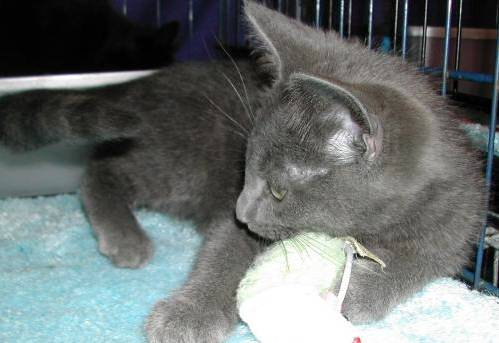

In [32]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/tensorflow-dog-cat/teste/100.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalizar a imagem

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/tensorflow-dog-cat/teste/100.jpg')


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 10s/step


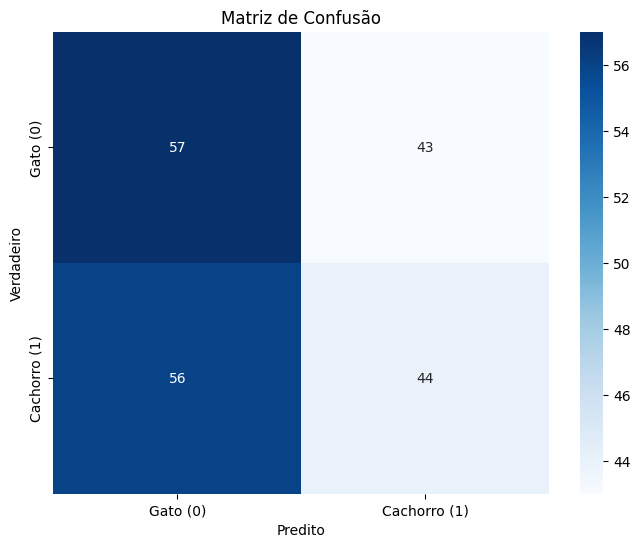

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obter as previsões do modelo
y_pred = classifier.predict(validation_set)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Converte probabilidades em classes (0 ou 1)

# 2. Obter as classes verdadeiras (ground truth)
y_true = validation_set.classes

# 3. Calcular a matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

# 4. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Gato (0)', 'Cachorro (1)'],
            yticklabels=['Gato (0)', 'Cachorro (1)'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

Melhorias adicionais para este modelo:

- Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
- Aumentar o redimensionamento da imagem de 64x64 para 256x256.
- Aumentar o tamanho do lote de 32 para 64.
- Alterar a arquitetura da rede incluindo mais uma camada convolucional.
- Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
- Experimentar outros algoritmos de otimização.